In [1]:
# Goal: Predict daily bike rental counts using time-series modeling (ARIMA, based pn historical rental data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# load the datsaset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# set date as index
df.set_index('dteday', inplace=True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


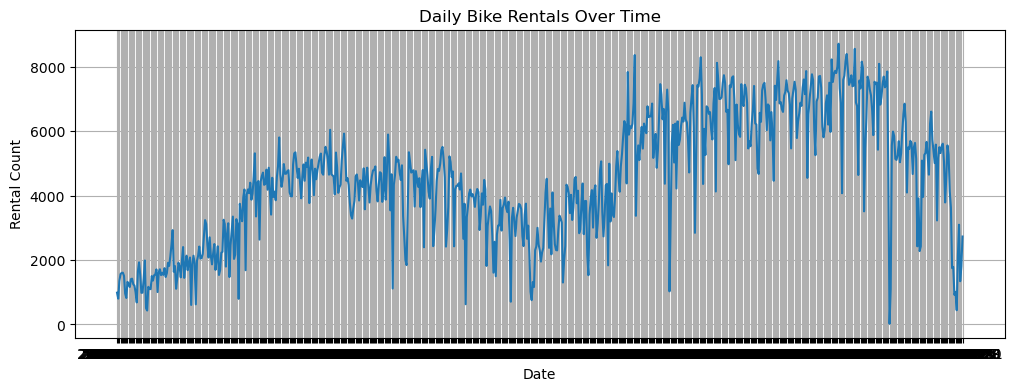

In [11]:
# visualize data
plt.figure(figsize=(12,4))
plt.plot(df['cnt'])
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.grid(True)
plt.show()

In [13]:
# check stationarity
from statsmodels.tsa.stattools import adfuller

In [15]:
# augmented Dikey-Fuller Test
result = adfuller(df['cnt'])
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistics: -1.8774481444374282
p-value: 0.3427434403392201


In [20]:
# train/test split
# use last 30 days as test
train = df['cnt'][:-30]
test = df['cnt'][-30:]

In [21]:
# fit ARIMA Model (Auto-ARIMA)
from pmdarima import auto_arima

In [ ]:
# automatically choose best ARIMA (p, d, q) using AIC
model = auto_arima(train, seasonal=True, m=365, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic


In [ ]:
# summary of chosen model
print(model.summary())

In [ ]:
# forecast for the next 30 days
forecast = model.predict(n_periods=30)

In [ ]:
# plot forecast vs actual
plt.figure(figsize=(12,5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(text.index, forecast, label='Forecast', linestyle='--')
plt.title('Bike Rentals Forecast vs Actual (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.legende()
plt.grid(True)
plt.show()

In [ ]:
# evaluate forecast accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")